In [1]:
%matplotlib inline

import nltk
import string
import os
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
import numpy as np
from sklearn.metrics.pairwise import linear_kernel
from collections import OrderedDict

In [2]:
path = '../data_cleaning/'
transcript_data_file = 'cleaned_transcript_manualEdits.csv'
# token_dict = {}
token_dict = OrderedDict()
stemmer = PorterStemmer()

In [3]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

def url_to_label(url):
    common_string = 'https://www.ted.com/talks/'
    label = url.replace(common_string,'').replace('\n','').replace('_', ' ')
#     label = url.replace('\n','')
    return label

In [4]:
data = pd.read_csv(path + transcript_data_file)
num_transcripts = data.shape[0]

In [5]:
# TODO: discover why some additional transcripts are getting dropped

for index, row in data.iterrows():
    
    if index % 100 == 0:
        print(f'Processing transcript {index} of {num_transcripts}')
        
    if isinstance(row['transcript'], str):
        label = url_to_label(row['url'])
        text = row['transcript']
        lowers = text.lower()
        no_punctuation = lowers.translate(str.maketrans('','',string.punctuation))
        token_dict[label] = no_punctuation
        
    elif np.isnan(row['transcript']):
        label = url_to_label(row['url'])
        print(f'\nNot included: {label}\n')
        
#     assert len(token_dict) == len(label_list), "Lengths don't match!"
#     if len(token_dict) != len(label_list):
#         print("Lengths don't match!")
#         print(f'Index: {index}')
#         break

Processing transcript 0 of 2467
Processing transcript 100 of 2467
Processing transcript 200 of 2467
Processing transcript 300 of 2467
Processing transcript 400 of 2467
Processing transcript 500 of 2467
Processing transcript 600 of 2467
Processing transcript 700 of 2467
Processing transcript 800 of 2467
Processing transcript 900 of 2467

Not included: robert gupta and joshua roman duet on passacaglia

Processing transcript 1000 of 2467
Processing transcript 1100 of 2467

Not included: quixotic fusion dancing with light

Processing transcript 1200 of 2467
Processing transcript 1300 of 2467
Processing transcript 1400 of 2467
Processing transcript 1500 of 2467
Processing transcript 1600 of 2467
Processing transcript 1700 of 2467

Not included: aakash odedra a dance in a hurricane of paper wind and light

Processing transcript 1800 of 2467
Processing transcript 1900 of 2467
Processing transcript 2000 of 2467

Not included: kaki king a musical escape into a world of light and color

Processi

In [6]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

In [7]:
similarity_matrix = np.zeros((tfs.shape[0],tfs.shape[0]))
for talk_idx in range(tfs.shape[0]):
    if talk_idx % 100 == 0:
        print(f'Computing Transcript Similarity {talk_idx} of {tfs.shape[0]}')
    similarity_matrix[talk_idx,:] = linear_kernel(tfs[talk_idx:talk_idx+1], tfs).flatten()

Computing Transcript Similarity 0 of 2459
Computing Transcript Similarity 100 of 2459
Computing Transcript Similarity 200 of 2459
Computing Transcript Similarity 300 of 2459
Computing Transcript Similarity 400 of 2459
Computing Transcript Similarity 500 of 2459
Computing Transcript Similarity 600 of 2459
Computing Transcript Similarity 700 of 2459
Computing Transcript Similarity 800 of 2459
Computing Transcript Similarity 900 of 2459
Computing Transcript Similarity 1000 of 2459
Computing Transcript Similarity 1100 of 2459
Computing Transcript Similarity 1200 of 2459
Computing Transcript Similarity 1300 of 2459
Computing Transcript Similarity 1400 of 2459
Computing Transcript Similarity 1500 of 2459
Computing Transcript Similarity 1600 of 2459
Computing Transcript Similarity 1700 of 2459
Computing Transcript Similarity 1800 of 2459
Computing Transcript Similarity 1900 of 2459
Computing Transcript Similarity 2000 of 2459
Computing Transcript Similarity 2100 of 2459
Computing Transcript S

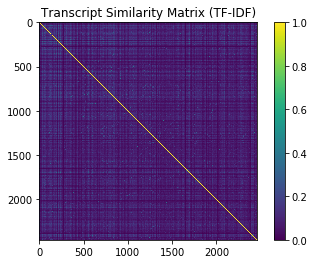

In [8]:
import matplotlib.pyplot as plt
im = plt.imshow(similarity_matrix)
cbar = plt.colorbar()
title = plt.title('Transcript Similarity Matrix (TF-IDF)')

In [9]:
# format and export the data
# tf_idf_df = pd.DataFrame(data=similarity_matrix,
#     index=list(token_dict.keys()),
#     columns=list(token_dict.keys()))

# tf_idf_df.to_csv('transcript_similarity.csv')

In [16]:
# round to 5 decimals to reduce file size (may be able to go to 3)
similarity_matrix_rounded = np.zeros(similarity_matrix.shape)
np.around(similarity_matrix, decimals=3, out=similarity_matrix_rounded)

array([[1.   , 0.188, 0.21 , ..., 0.096, 0.21 , 0.128],
       [0.188, 1.   , 0.213, ..., 0.057, 0.159, 0.115],
       [0.21 , 0.213, 1.   , ..., 0.094, 0.196, 0.109],
       ...,
       [0.096, 0.057, 0.094, ..., 1.   , 0.077, 0.065],
       [0.21 , 0.159, 0.196, ..., 0.077, 1.   , 0.131],
       [0.128, 0.115, 0.109, ..., 0.065, 0.131, 1.   ]])

In [17]:
# format and export the data
tf_idf_df_rounded = pd.DataFrame(data=similarity_matrix_rounded,
    index=list(token_dict.keys()),
    columns=list(token_dict.keys()))

tf_idf_df_rounded.to_csv('similarity_scores.csv')